In [7]:

t_n =  2.51 # mm
t_l =  0.5 # mm


# t_n =  2.0 # mm
# t_l =  0.5 # mm

B = 25.0 # mm 

In [8]:
from validation.experimental import full_experiment

df = full_experiment()
df

,Name,Tension maxima Traccion (MPa),% epsilon,Tension maxima Flexion (MPa),Ancho flexion (mm),Espesor (mm),F/delta,Julios,Ancho Impacto (mm),Espesor Impacto (mm),Seccion sin entalla (mm),Resiliencia (KJ/m2),Modulo (GPa),Modulo flexion (GPa)
0,TFP1,293.08,0.118750,146.66,25.5,5.3,937.045455,3.39,15.3,4.9,74.97,45.218087,2.838353,13.328664
1,TFP1,264.43,0.116583,145.19,25.6,5.3,971.046512,4.28,15.2,4.9,74.48,57.465091,2.685491,13.758346
2,TFP1,279.80,0.134583,113.14,25.7,5.2,837.567568,3.94,15.5,5.0,77.50,50.838710,3.132684,12.516141
3,TFP2,153.74,0.090500,134.87,25.6,4.7,529.272727,1.80,15.2,4.4,66.88,26.913876,2.184874,10.753250
4,TFP2,153.51,0.084833,113.21,25.5,4.7,469.619048,2.75,15.5,4.6,71.30,38.569425,2.310839,9.578681
5,TFP2,152.83,0.087333,104.21,25.6,4.7,456.590909,2.60,15.6,4.5,70.20,37.037037,2.279795,9.276571
6,TFP3,139.04,0.089333,132.54,25.2,4.8,446.456693,2.24,15.3,5.1,78.03,28.706908,2.005195,8.650652
7,TFP3,131.44,0.085083,122.15,25.5,4.9,530.097087,1.77,15.4,4.7,72.38,24.454269,1.996418,9.541590
8,TFP3,140.86,0.087917,129.47,25.5,4.8,494.758064,3.31,15.4,4.9,75.46,43.864299,1.999697,9.473768
9,TFP4,184.55,0.097167,145.76,25.8,4.7,548.679245,1.58,15.1,4.5,67.95,23.252391,2.450986,11.061118


In [9]:
import numpy as np
import pandas as pd
from validation.get_vector import get_vector

In [10]:
composition = [
        ["Y", "Y"],
        ["Y", "X"],
        ["Y", "SX"],
        ["Y", "SY"],
        ["Y","SX", "SY"],
        ["Y","X", "SY"]
    ]

df = pd.DataFrame({"layers":composition})
df['v [X,SX,Y,SY]'] = df['layers'].apply(get_vector)
# 
n_l = [ len(i) for i in composition]
n_l = np.array(n_l)


t_t = t_n + 2*n_l*t_l
rng = lambda in_l: np.arange(1,in_l+1,1) # 1 -> [1], 
                                         # 2 -> [1,2], 
                                         # 3 -> [1,2,3]

Ygs = [ t_n/2 + rng(in_l)*t_l -0.5*t_l  for in_l in n_l]

I_l =  [ t_l**3/12 + t_l*iYgs**2 for iYgs in Ygs]
I_n = (1/12)*t_n**3
I_t = (1/12)*t_t**3

df["Ygs"] = Ygs
df["n_l"] = n_l
df["t_t"] = t_t
# sort X,SX,Y,SY




In [11]:
df

,layers,"v [X,SX,Y,SY]",Ygs,n_l,t_t
0,"[Y, Y]","[0, 0, 1, 0]","[1.505, 2.005]",2,4.51
1,"[Y, X]","[1, 0, 1, 0]","[1.505, 2.005]",2,4.51
2,"[Y, SX]","[0, 1, 1, 0]","[1.505, 2.005]",2,4.51
3,"[Y, SY]","[0, 0, 1, 1]","[1.505, 2.005]",2,4.51
4,"[Y, SX, SY]","[0, 1, 1, 1]","[1.505, 2.005, 2.505]",3,5.51
5,"[Y, X, SY]","[1, 0, 1, 1]","[1.505, 2.005, 2.505]",3,5.51


In [12]:
print("I_l", I_l)
print("I_n", I_n)
print("I_t", I_t)

I_l [array([1.14292917, 2.02042917]), array([1.14292917, 2.02042917]), array([1.14292917, 2.02042917]), array([1.14292917, 2.02042917]), array([1.14292917, 2.02042917, 3.14792917]), array([1.14292917, 2.02042917, 3.14792917])]
I_n 1.3177709166666662
I_t [ 7.64448758  7.64448758  7.64448758  7.64448758 13.94034592 13.94034592]


In [13]:
def E_flexion(E_n,E_l):

    E_l = np.array(E_l)

    E_l_dict = {"X" :E_l[0], 
                "SX":E_l[1], 
                "Y" :E_l[2], 
                "SY":E_l[3]}

    E_l_sel = [ [ E_l_dict[i] for i in l] 
               for l in composition]
    
    El_Il_sum =  np.array([ np.sum(iE*iI) 
                            for iE,iI in zip(E_l_sel,I_l)])
    
    return (E_n*I_n + 2*El_Il_sum)/I_t



In [14]:
df_data = pd.read_csv("experimental.csv")

In [15]:
df_data["Modulo flexion [GPa]"] =  df_data["Modulo flexion [MPa]"]/1000
df_data = df_data.drop(columns=["Modulo flexion [MPa]"])
df_data = df_data.drop(columns=["Tension maxima [MPa]"])
df_data["Espesor [mm]"] = 0.5*df_data["Espesor [mm]"] + 0.5*df_data["Espesor_2 [mm]"]
df_data = df_data.drop(columns=["Espesor_2 [mm]"])

# 
#  Ancho [mm]-> B [mm]
#  Espesor [mm] -> t [mm]
#  Modulo flexion [MPa] -> E [GPa]

df_data["B [mm]"] = df_data["Ancho [mm]"]
df_data["t [mm]"] = df_data["Espesor [mm]"]
df_data["E [GPa]"] = df_data["Modulo flexion [GPa]"]

df_data = df_data.drop(columns=["Ancho [mm]"])
df_data = df_data.drop(columns=["Espesor [mm]"])
df_data = df_data.drop(columns=["Modulo flexion [GPa]"])


In [16]:
df_stats = df_data.groupby('Nombre').agg(['mean', 'std'])
df_stats["layers"] = composition

In [17]:
df_stats

B [mm]              t [mm]              E [GPa]            \
             mean       std      mean       std       mean       std   
Nombre                                                                 
TFP1-1  25.600000  0.100000  5.100000  0.000000  13.201050  0.630858   
TFP2-1  25.566667  0.057735  4.600000  0.050000   9.869501  0.780113   
TFP3-1  25.400000  0.173205  4.866667  0.076376   9.222003  0.495965   
TFP4-1  25.666667  0.152753  4.600000  0.000000  10.181815  0.770635   
TFP5-1  25.166667  0.152753  5.716667  0.057735   6.143105  0.161637   
TFP6-1  25.033333  0.635085  5.566667  0.028868   7.798060  0.334186   

             layers  
                     
Nombre               
TFP1-1       [Y, Y]  
TFP2-1       [Y, X]  
TFP3-1      [Y, SX]  
TFP4-1      [Y, SY]  
TFP5-1  [Y, SX, SY]  
TFP6-1   [Y, X, SY]

In [18]:
from matplotlib import pyplot as plt

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'TFP1-1'),
  Text(1, 0, 'TFP2-1'),
  Text(2, 0, 'TFP3-1'),
  Text(3, 0, 'TFP4-1'),
  Text(4, 0, 'TFP5-1'),
  Text(5, 0, 'TFP6-1')])

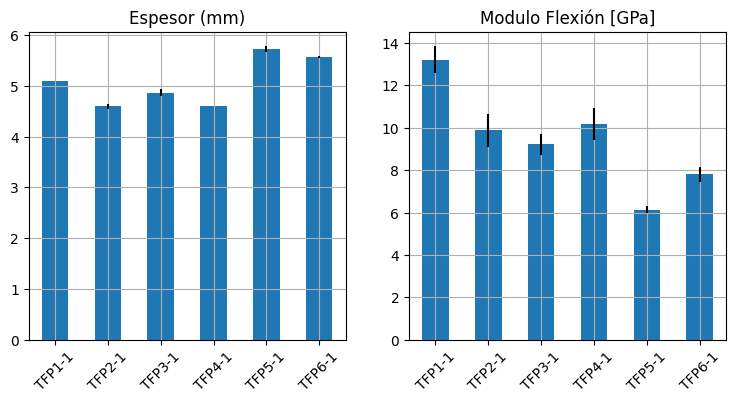

In [19]:
# plot bars with error bars Espesor (mm)
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(121)
df_stats['t [mm]'].plot(kind='bar', y='mean', 
                        yerr='std', 
                        legend=False, 
                        title='Espesor (mm)', 
                        ax=ax)
# ticks angle
plt.xticks(rotation=45)
plt.xlabel('') 

# plot bars with error bars Modulo Tracción [MPa]
plt.grid()
ax = fig.add_subplot(122)
df_stats['E [GPa]'].plot(kind='bar', y='mean', yerr='std', legend=False, 
                         title='Modulo Flexión [GPa]', ax=ax)
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)

In [20]:
n_l

array([2, 2, 2, 2, 3, 3])

In [21]:
t_n

2.51

In [22]:
t_l

0.5

In [23]:
n_l*t_l + 2*t_l*n_l

array([3. , 3. , 3. , 3. , 4.5, 4.5])

In [24]:
tau_pred_fcn = lambda tn,tl: tn + 2*tl*n_l

E_n = 20
E_l = [ 40,20,30,30]

E_fl_pred = E_flexion(E_n,E_l)

tau_pred = tau_pred_fcn(t_n,t_l)


In [25]:
len(E_flexion(E_n,E_l))

6

In [26]:
df_data["E [GPa]"]

0     13.328664
1     13.758346
2     12.516141
3     10.753250
4      9.578681
5      9.276571
6      8.650652
7      9.541590
8      9.473768
9     11.061118
10     9.860483
11     9.623845
12     6.069124
13     6.328492
14     6.031700
15     7.960318
16     8.020138
17     7.413724
Name: E [GPa], dtype: float64

In [27]:
# optimize E_n and E_l 
from scipy.optimize import minimize,basinhopping

def objective(x):
    E_n = x[0]
    E_l = x[1:]

    Loss = np.sum((E_flexion(E_n,E_l) - df_stats["E [GPa]"]["mean"].values)**2)

    # E_n > E_l for all layers
    Loss_nucl = np.sum(np.maximum(0,E_n - E_l))
    return Loss + Loss_nucl*1e4

x0 = np.array([E_n,*E_l])

# must be positive
bounds = [(0,None) for i in range(len(x0))]
res = basinhopping(objective, x0, niter=50,minimizer_kwargs={"bounds":bounds,"method":"Nelder-Mead"})
res
E_l_opt = res.x[1:]
E_n_opt = res.x[0]
E_fl_pred = E_flexion(res.x[0],res.x[1:])
tau_pred = tau_pred_fcn(t_n,t_l)

In [28]:
t_n + t_l

3.01

In [29]:
t_l

0.5

In [30]:
df_stats["E pred [GPa]"] = E_fl_pred
df_stats["t pred [MPa]"] = tau_pred

In [31]:
df_stats

B [mm]              t [mm]              E [GPa]            \
             mean       std      mean       std       mean       std   
Nombre                                                                 
TFP1-1  25.600000  0.100000  5.100000  0.000000  13.201050  0.630858   
TFP2-1  25.566667  0.057735  4.600000  0.050000   9.869501  0.780113   
TFP3-1  25.400000  0.173205  4.866667  0.076376   9.222003  0.495965   
TFP4-1  25.666667  0.152753  4.600000  0.000000  10.181815  0.770635   
TFP5-1  25.166667  0.152753  5.716667  0.057735   6.143105  0.161637   
TFP6-1  25.033333  0.635085  5.566667  0.028868   7.798060  0.334186   

             layers E pred [GPa] t pred [MPa]  
                                               
Nombre                                         
TFP1-1       [Y, Y]    13.620581         4.51  
TFP2-1       [Y, X]     9.721223         4.51  
TFP3-1      [Y, SX]     8.711639         4.51  
TFP4-1      [Y, SY]     8.778776         4.51  
TFP5-1  [Y, SX, SY]     7.514863         5.51  
TFP6-1   [Y, X, SY]     8.068490         5.51

Text(0.5, 1.0, 'Modulo Flexión [GPa]')

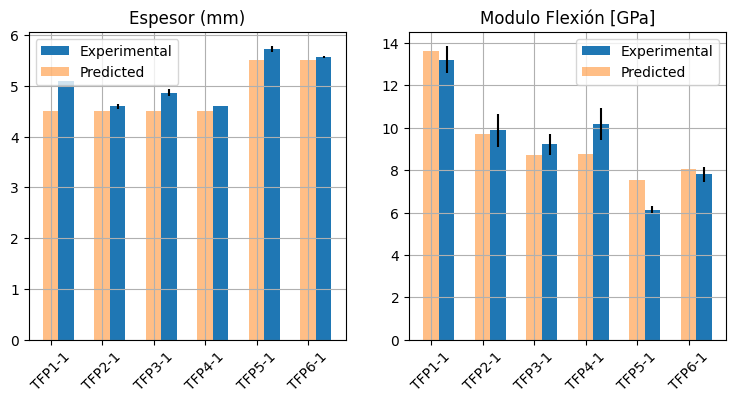

In [32]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(121)

plt.bar(idx_range+width , df_stats['t [mm]']['mean'], yerr=df_stats['t [mm]']['std'], label='Experimental',width=width)
plt.bar(idx_range, tau_pred, label='Predicted', alpha=0.5, width=width)
plt.title('Espesor (mm)')

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('') 
plt.grid()
plt.xticks(idx_range, idx);

ax = fig.add_subplot(122)

# plot bars with error bars Modulo Tracción [MPa] and prediction

plt.bar(idx_range+width , df_stats['E [GPa]']['mean'], yerr=df_stats['E [GPa]']['std'], label='Experimental',width=width)
plt.bar(idx_range, df_stats['E pred [GPa]'], label='Predicted', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);

plt.title('Modulo Flexión [GPa]')

In [33]:
df_stats["E pred [GPa]"]

Nombre
TFP1-1    13.620581
TFP2-1     9.721223
TFP3-1     8.711639
TFP4-1     8.778776
TFP5-1     7.514863
TFP6-1     8.068490
Name: E pred [GPa], dtype: float64

In [34]:
df_stats["t [mm]"].values

array([[5.1       , 0.        ],
       [4.6       , 0.05      ],
       [4.86666667, 0.07637626],
       [4.6       , 0.        ],
       [5.71666667, 0.05773503],
       [5.56666667, 0.02886751]])

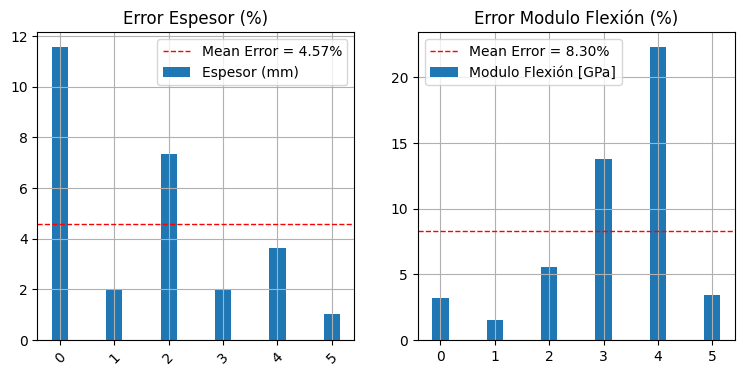

In [35]:
# error 

df_stats["E error [%]"] = 100*abs(df_stats['E [GPa]']['mean'] - df_stats['E pred [GPa]'])/df_stats['E [GPa]']['mean']

df_stats["t error [%]"] = 100*abs(df_stats['t [mm]']['mean'] - tau_pred)/df_stats['t [mm]']['mean']

fig = plt.figure(figsize=(9, 4))

ax = fig.add_subplot(121)

plt.bar(idx_range, df_stats['t error [%]'], label='Espesor (mm)',width=width)
# line in error mean 
plt.axhline(df_stats['t error [%]'].mean(), color='r', 
            linestyle='dashed', linewidth=1,label='Mean Error = {:.2f}%'.format(df_stats['t error [%]'].mean()))
plt.title('Error Espesor (%)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)



ax = fig.add_subplot(122)

plt.bar(idx_range, df_stats['E error [%]'], 
        label='Modulo Flexión [GPa]',width=width)

# line in error mean
plt.axhline(df_stats['E error [%]'].mean(), color='r', 
            linestyle='dashed', 
            linewidth=1,
            label='Mean Error = {:.2f}%'.format(df_stats['E error [%]'].mean()))

plt.title('Error Modulo Flexión (%)')
plt.grid()
plt.legend()

In [36]:
# X,SX,Y,SY

In [37]:
print("E_n_opt",E_n_opt)
print("E_l_opt",E_l_opt)

E_n_opt 5.93471702433707
E_l_opt [ 7.84464734  5.93471704 15.22144445  6.0617268 ]


In [38]:
df_opt = pd.DataFrame({"E [GPa]": [E_n_opt,*E_l_opt]})
df_opt.index = ["nucleo","X","SX","Y","SY"]
df_opt.round(2)

,E [GPa]
nucleo,5.93
X,7.84
SX,5.93
Y,15.22
SY,6.06


In [39]:
df_save = pd.DataFrame({"E [GPa]": df_stats['E [GPa]']['mean'].values,
                        "E pred [GPa]": df_stats['E pred [GPa]'].values,
                        "Name": df_stats.index})

df_save.to_csv("output.csv", index=False)

In [40]:
df_save

,E [GPa],E pred [GPa],Name
0,13.201050,13.620581,TFP1-1
1,9.869501,9.721223,TFP2-1
2,9.222003,8.711639,TFP3-1
3,10.181815,8.778776,TFP4-1
4,6.143105,7.514863,TFP5-1
5,7.798060,8.068490,TFP6-1
